# Work on Sample data from League of Legends

In [3]:
import pandas as pd
import json

file = '../raw_data/full_dump.json'
with open(file) as data_file:    
    data = json.load(data_file) 
#data = data[:]
len(data)

35320

In [2]:
data_keys = list(data.keys())
data_keys

['EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_1_1',
 'EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_2_1',
 'EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_3_1',
 'EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_4_1',
 'EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_5_1',
 'EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_6_1',
 'EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_7_1',
 'EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_8_1',
 'EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_9_1',
 'EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_10_1',
 'EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_11_1',
 'EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards/3-4_1_1',
 'EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards/3-4_2_1',
 'EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards/3-

In [33]:
import numpy as np
import re

pattern = r'(\d{4})'
re.search(pattern, data_keys[2]).group(1)

year = []
no_year = []
for i in range(len(data_keys)):
    try:
        year.append(re.search(pattern, data_keys[i]).group(1))
    except:
        no_year.append(data_keys[i])
#print(year)

#re.search(pattern, data_keys[1]).group(1)
#year = [re.search(r"(\d{4})", y) for y in data_keys]
#year = [y.split('/')[1][:4] for y in data_keys]
#year[0].group(1)
np.unique(year), len(no_year)

(array(['2016', '2017', '2018', '2019', '2020', '2021'], dtype='<U4'), 1703)

In [9]:
data['EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_1_1']

{'id': 'EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_1_1',
 'start': None,
 'patch': '6.24',
 'winner': 'BLUE',
 'duration': 2023,
 'acs_teams': {},
 'picks_bans': [],
 'teams': {'BLUE': {'name': 'Fnatic Academy',
   'total_turret_kills': 11,
   'total_inhibitor_kills': 3,
   'total_rift_herald_kills': 0,
   'total_dragon_kills': 2,
   'total_baron_kills': 1,
   'side': 'BLUE',
   'players': [{'name': 'Kikis',
     'id': 172122,
     'role': 'TOP',
     'champion_name': 'Nautilus',
     'champion_id': 111,
     'gold_15': 5326,
     'kills_assists_15': 8,
     'deaths_15': 1,
     'total_gold': 12504,
     'total_cs': 233,
     'total_kills': 2,
     'total_monster_kills': 0,
     'total_assists': 6,
     'total_deaths': 1,
     'total_damage_taken': 18220,
     'total_damage_dealt': 156270,
     'win': True,
     'side': 'BLUE'},
    {'name': 'Broxah',
     'id': 193072,
     'role': 'JGL',
     'champion_name': 'Lee Sin',
     'champion_id': 64,
     'gold_15': 5261

In [10]:
data['EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_1_1'].keys()

dict_keys(['id', 'start', 'patch', 'winner', 'duration', 'acs_teams', 'picks_bans', 'teams'])

In [11]:
data['EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_1_1']['teams'].keys()

dict_keys(['BLUE', 'RED'])

In [12]:
data['EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_1_1']['teams']['BLUE'].keys()

dict_keys(['name', 'total_turret_kills', 'total_inhibitor_kills', 'total_rift_herald_kills', 'total_dragon_kills', 'total_baron_kills', 'side', 'players'])

In [13]:
data['EU Challenger Series/2017 Season/Spring Qualifiers/Scoreboards_1_1']['teams']['BLUE']['players'][0].keys()

dict_keys(['name', 'id', 'role', 'champion_name', 'champion_id', 'gold_15', 'kills_assists_15', 'deaths_15', 'total_gold', 'total_cs', 'total_kills', 'total_monster_kills', 'total_assists', 'total_deaths', 'total_damage_taken', 'total_damage_dealt', 'win', 'side'])

### To remove
video, team_name, 'total_monster_kills', 'damage_share', 'total_vision_score'

## Normalize the JSON file into a Pandas DataFrame

Data is structured in a JSON structure that is inconvinient for data analysis. Converting nested JSON structures to Pandas DataFrames using https://medium.com/swlh/converting-nested-json-structures-to-pandas-dataframes-e8106c59976e

In [22]:
#Normalize the teams input
df_normalized_teams = pd.json_normalize(data.values())

In [23]:
df_normalized_teams.head()

,id,start,patch,winner,duration,picks_bans,teams.BLUE.name,teams.BLUE.total_turret_kills,teams.BLUE.total_inhibitor_kills,teams.BLUE.total_rift_herald_kills,...,teams.BLUE.side,teams.BLUE.players,teams.RED.name,teams.RED.total_turret_kills,teams.RED.total_inhibitor_kills,teams.RED.total_rift_herald_kills,teams.RED.total_dragon_kills,teams.RED.total_baron_kills,teams.RED.side,teams.RED.players
0,EU Challenger Series/2017 Season/Spring Qualif...,None,6.24,BLUE,2023,[],Fnatic Academy,11,3,0,...,BLUE,"[{'name': 'Kikis', 'id': 172122, 'role': 'TOP'...",EURONICS Gaming,4,0,0,1,0,RED,"[{'name': 'Phones', 'id': 193289, 'role': 'TOP..."
1,EU Challenger Series/2017 Season/Spring Qualif...,None,6.24,RED,1782,[],AlienTech eSports,3,0,0,...,BLUE,"[{'name': 'FearlessS', 'id': 159248, 'role': '...",Team Larssen,7,1,1,2,1,RED,"[{'name': 'Arin', 'id': 190279, 'role': 'TOP',..."
2,EU Challenger Series/2017 Season/Spring Qualif...,None,6.24,RED,2465,[],Bobaski,4,0,0,...,BLUE,"[{'name': 'Unknown', 'id': 202415, 'role': 'TO...",Nerv,9,1,0,3,1,RED,"[{'name': 'Ruin', 'id': 196486, 'role': 'TOP',..."
3,EU Challenger Series/2017 Season/Spring Qualif...,None,6.24,BLUE,1925,[],Team Forge,11,4,0,...,BLUE,"[{'name': 'beansu', 'id': 191813, 'role': 'TOP...",Tricked Esport,0,0,0,0,1,RED,"[{'name': 'Atom', 'id': 190541, 'role': 'TOP',..."
4,EU Challenger Series/2017 Season/Spring Qualif...,None,6.24,BLUE,1507,[],Team-LDLC,11,3,0,...,BLUE,"[{'name': 'Fraid', 'id': 221099, 'role': 'TOP'...",ASUS ROG Army,1,0,0,0,0,RED,"[{'name': 'Yoppa', 'id': 205863, 'role': 'TOP'..."


In [28]:
df_normalized_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35320 entries, 0 to 35319
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  35320 non-null  object
 1   start                               0 non-null      object
 2   patch                               35320 non-null  object
 3   winner                              35320 non-null  object
 4   duration                            35320 non-null  int64 
 5   picks_bans                          35320 non-null  object
 6   teams.BLUE.name                     35320 non-null  object
 7   teams.BLUE.total_turret_kills       35320 non-null  int64 
 8   teams.BLUE.total_inhibitor_kills    35320 non-null  int64 
 9   teams.BLUE.total_rift_herald_kills  35320 non-null  int64 
 10  teams.BLUE.total_dragon_kills       35320 non-null  int64 
 11  teams.BLUE.total_baron_kills        35320 non-null  in

In [29]:
df_normalized_teams.drop('video', axis=1, inplace = True)

KeyError: "['video'] not found in axis"

In [9]:
df_normalized_teams.drop(['teams.BLUE.name', 'teams.RED.name'], axis=1, inplace=True)

In [10]:
df_normalized_teams['teams.BLUE.players'].explode()

0        {'name': 'Wewillfailer', 'champion_name': 'Mal...
0        {'name': 'Cyanide', 'champion_name': 'Nunu & W...
0        {'name': 'Shushei', 'champion_name': 'Alistar'...
0        {'name': 'LaMiaZeaLoT', 'champion_name': 'Cork...
0        {'name': 'Mellisan', 'champion_name': 'Janna',...
                               ...                        
18253    {'name': 'Flaai', 'champion_name': 'Sett', 'ch...
18253    {'name': 'Adampongo', 'champion_name': 'Jarvan...
18253    {'name': 'Necropolisak', 'champion_name': 'Ryz...
18253    {'name': 'Kneza', 'champion_name': 'Lucian', '...
18253    {'name': 'Phenix', 'champion_name': 'Lulu', 'c...
Name: teams.BLUE.players, Length: 91270, dtype: object

In [11]:
df_normalized_BLUE = pd.json_normalize(df_normalized_teams['teams.BLUE.players'].explode())
df_normalized_BLUE

,name,champion_name,champion_id,gd_15,kills_assists_15,deaths_15,gold_share_post_15,damage_share,jungle_proximity,support_proximity,...,total_monster_kills,total_assists,total_deaths,total_vision_score,total_damage_taken,total_damage_dealt,trueskill_sigma,trueskill_mu,win,side
0,Wewillfailer,Malzahar,90,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE
1,Cyanide,Nunu & Willump,20,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE
2,Shushei,Alistar,12,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE
3,LaMiaZeaLoT,Corki,42,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE
4,Mellisan,Janna,40,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91265,Flaai,Sett,875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,6.0,4.0,51.0,28321.0,115423.0,4.829746,34.512520,True,BLUE
91266,Adampongo,Jarvan IV,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.0,14.0,2.0,46.0,32735.0,170233.0,6.328289,25.607258,True,BLUE
91267,Necropolisak,Ryze,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.0,4.0,2.0,28.0,15094.0,173262.0,5.523678,28.171322,True,BLUE
91268,Kneza,Lucian,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,5.0,0.0,62.0,19019.0,305263.0,3.868226,30.766910,True,BLUE


In [12]:
df_normalized_RED = pd.json_normalize(df_normalized_teams['teams.RED.players'].explode(), )
df_normalized_RED

,name,champion_name,champion_id,gd_15,kills_assists_15,deaths_15,gold_share_post_15,damage_share,jungle_proximity,support_proximity,...,total_monster_kills,total_assists,total_deaths,total_vision_score,total_damage_taken,total_damage_dealt,trueskill_sigma,trueskill_mu,win,side
0,None,Karthus,30,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED
1,None,Amumu,32,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED
2,None,Twisted Fate,4,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED
3,None,Garen,86,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED
4,None,Taric,44,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91265,Kulvas,Camille,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,4.0,5.0,45.0,27259.0,169260.0,3.942188,32.053300,False,RED
91266,Hiro (Nguyên Đại Hải),Miss Fortune,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,0.0,5.0,40.0,12090.0,177612.0,3.647015,26.539326,False,RED
91267,Jackisek,LeBlanc,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,7.0,3.0,38.0,23435.0,125024.0,4.037007,32.472115,False,RED
91268,Smarty,Nami,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,9.0,6.0,82.0,11427.0,11595.0,4.107074,38.463030,False,RED


### Get the game id to properly analyze the data

We have two different dataframes for team Blue and team Red, we can merge them on the game id. This will also be useful when we want to come back for the y parameter! 

In [13]:
# Extract the index corresponding to the game id 
get_index = df_normalized_teams['id'].tolist()
get_index[:10], len(get_index)

([2, 4, 5, 7, 9, 12, 38, 39, 41, 43], 18254)

In [14]:
import numpy as np

index_preproc = np.asarray([[index] * 5 for index in get_index])
index_preproc.shape

(18254, 5)

In [15]:
#reshape the array to 1D
## 5 is because there are 5 players per team
index_teams = index_preproc.reshape(len(df_normalized_teams) * 5).tolist()
index_teams[0:12]

[2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 5, 5]

In [16]:
df_normalized_RED['index_teams'] = index_teams
df_normalized_BLUE['index_teams'] = index_teams

In [17]:
df_normalized_BLUE

,name,champion_name,champion_id,gd_15,kills_assists_15,deaths_15,gold_share_post_15,damage_share,jungle_proximity,support_proximity,...,total_assists,total_deaths,total_vision_score,total_damage_taken,total_damage_dealt,trueskill_sigma,trueskill_mu,win,side,index_teams
0,Wewillfailer,Malzahar,90,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE,2
1,Cyanide,Nunu & Willump,20,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE,2
2,Shushei,Alistar,12,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE,2
3,LaMiaZeaLoT,Corki,42,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE,2
4,Mellisan,Janna,40,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.333333,20.000000,True,BLUE,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91265,Flaai,Sett,875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,4.0,51.0,28321.0,115423.0,4.829746,34.512520,True,BLUE,19525
91266,Adampongo,Jarvan IV,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,2.0,46.0,32735.0,170233.0,6.328289,25.607258,True,BLUE,19525
91267,Necropolisak,Ryze,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,28.0,15094.0,173262.0,5.523678,28.171322,True,BLUE,19525
91268,Kneza,Lucian,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,0.0,62.0,19019.0,305263.0,3.868226,30.766910,True,BLUE,19525


In [18]:
df_normalized_RED

,name,champion_name,champion_id,gd_15,kills_assists_15,deaths_15,gold_share_post_15,damage_share,jungle_proximity,support_proximity,...,total_assists,total_deaths,total_vision_score,total_damage_taken,total_damage_dealt,trueskill_sigma,trueskill_mu,win,side,index_teams
0,None,Karthus,30,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED,2
1,None,Amumu,32,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED,2
2,None,Twisted Fate,4,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED,2
3,None,Garen,86,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED,2
4,None,Taric,44,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RED,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91265,Kulvas,Camille,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,5.0,45.0,27259.0,169260.0,3.942188,32.053300,False,RED,19525
91266,Hiro (Nguyên Đại Hải),Miss Fortune,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5.0,40.0,12090.0,177612.0,3.647015,26.539326,False,RED,19525
91267,Jackisek,LeBlanc,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,3.0,38.0,23435.0,125024.0,4.037007,32.472115,False,RED,19525
91268,Smarty,Nami,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,6.0,82.0,11427.0,11595.0,4.107074,38.463030,False,RED,19525


There are 3 created dataframes important in this section:
```df_normalized_teams, df_normalized_BLUE and df_normalized_RED```

# Preprocess the data

## Simple Impute the data

In [19]:
df_normalized_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18254 entries, 0 to 18253
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  18254 non-null  int64  
 1   start                               18254 non-null  object 
 2   patch                               18254 non-null  object 
 3   winner                              18254 non-null  object 
 4   duration                            18248 non-null  float64
 5   picks_bans                          18254 non-null  object 
 6   teams.BLUE.total_turret_kills       18248 non-null  float64
 7   teams.BLUE.total_inhibitor_kills    11295 non-null  float64
 8   teams.BLUE.total_rift_herald_kills  15761 non-null  float64
 9   teams.BLUE.total_dragon_kills       18248 non-null  float64
 10  teams.BLUE.total_baron_kills        18248 non-null  float64
 11  teams.BLUE.players                  18254

### Get the year the game was played

In [20]:
df_normalized_teams['start'] = pd.to_datetime(df_normalized_teams['start'])
df_normalized_teams['year'] = pd.DatetimeIndex(df_normalized_teams['start']).year
games_year = df_normalized_teams.year.unique()
games_year

array([2011, 2012, 2013, 2021, 2015, 2016, 2014])

In [21]:
#games played every year
for year in games_year:
    N_games = len(df_normalized_teams[df_normalized_teams['year'] == year])
    print(f'Number of games in {year}: {N_games}')

Number of games in 2011: 28
Number of games in 2012: 428
Number of games in 2013: 1303
Number of games in 2021: 14003
Number of games in 2015: 1544
Number of games in 2016: 204
Number of games in 2014: 744


In [22]:
#Use games only from 2021 and other years when we get the data
def choose_years_to_work(df, *args):
    years_dict = {}
    for year in args:
        years_dict[year] = df[df['year'] == year]
    return pd.concat(years_dict).droplevel(0)

df_data_by_year = choose_years_to_work(df_normalized_teams, 2021)
df_data_by_year

,id,start,patch,winner,duration,picks_bans,teams.BLUE.total_turret_kills,teams.BLUE.total_inhibitor_kills,teams.BLUE.total_rift_herald_kills,teams.BLUE.total_dragon_kills,teams.BLUE.total_baron_kills,teams.BLUE.players,teams.RED.total_turret_kills,teams.RED.total_inhibitor_kills,teams.RED.total_rift_herald_kills,teams.RED.total_dragon_kills,teams.RED.total_baron_kills,teams.RED.players,year
22,19158,2021-01-01 00:00:00+00:00,11.19,BLUE,NaN,[],NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Jayce', 'cha...",NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Ornn', 'cham...",2021
135,19162,2021-01-01 00:00:00+00:00,11.19,BLUE,NaN,[],NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Jayce', 'cha...",NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Ornn', 'cham...",2021
161,19166,2021-01-01 00:00:00+00:00,11.19,BLUE,NaN,[],NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Jayce', 'cha...",NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Ornn', 'cham...",2021
225,19170,2021-01-01 00:00:00+00:00,11.19,BLUE,NaN,[],NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Jayce', 'cha...",NaN,NaN,NaN,NaN,NaN,"[{'name': None, 'champion_name': 'Ornn', 'cham...",2021
238,1297,2021-01-11 16:33:13+00:00,11.1,RED,1666.0,[],2.0,0.0,2.0,0.0,0.0,"[{'name': 'RJX ZaFiR', 'champion_name': 'Thres...",10.0,2.0,0.0,4.0,1.0,"[{'name': 'CBI SneakyLemon', 'champion_name': ...",2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18249,19521,2021-11-07 15:02:32+00:00,11.21,BLUE,1576.0,"[{'ban': True, 'champion_id': 0, 'champion_nam...",10.0,1.0,2.0,2.0,1.0,"[{'name': 'Tasaa', 'champion_name': 'Mordekais...",1.0,0.0,0.0,2.0,0.0,"[{'name': 'Dejvos', 'champion_name': 'Nautilus...",2021
18250,19522,2021-11-07 15:52:33+00:00,11.21,BLUE,2299.0,"[{'ban': True, 'champion_id': 0, 'champion_nam...",9.0,1.0,2.0,4.0,1.0,"[{'name': 'Wapode', 'champion_name': 'Ezreal',...",3.0,0.0,0.0,2.0,1.0,"[{'name': 'Pepi (Miro Rauten)', 'champion_name...",2021
18251,19523,2021-11-07 17:02:12+00:00,11.21,RED,1467.0,"[{'ban': True, 'champion_id': 0, 'champion_nam...",5.0,0.0,1.0,1.0,0.0,"[{'name': 'Hachi (Davy de Graaf)', 'champion_n...",8.0,1.0,1.0,2.0,1.0,"[{'name': 'Welcom', 'champion_name': 'Gwen', '...",2021
18252,19524,2021-11-07 17:51:39+00:00,11.21,RED,2053.0,"[{'ban': True, 'champion_id': 0, 'champion_nam...",7.0,2.0,2.0,1.0,0.0,"[{'name': 'Trungi', 'champion_name': 'Camille'...",9.0,1.0,0.0,4.0,2.0,"[{'name': 'Deffaren', 'champion_name': 'Braum'...",2021


In [23]:
# We don't need the rest of the date so we can drop the data
df_data_by_year.drop('start', axis=1, inplace=True)

In [24]:
#Check if the data is balanced (almost 50/50 chance to win)
winner = [1 if value == 'BLUE' else 0 for value in df_data_by_year.winner]
len(winner), sum(winner)

(14003, 7451)

In [25]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit(df_data_by_year.winner).transform(df_data_by_year.winner)

### Simple Impute the Team Data

Check for null data for the join teams dataframe (previously df_normalized_teams)

In [26]:
#Number of missing values for each feature
df_data_by_year.isnull().sum().sort_values(ascending=False)

teams.RED.total_inhibitor_kills       3315
teams.BLUE.total_inhibitor_kills      3315
teams.BLUE.total_rift_herald_kills    2027
teams.RED.total_rift_herald_kills     2027
teams.BLUE.total_baron_kills             6
duration                                 6
teams.RED.total_baron_kills              6
teams.BLUE.total_turret_kills            6
teams.BLUE.total_dragon_kills            6
teams.RED.total_dragon_kills             6
teams.RED.total_turret_kills             6
teams.RED.players                        0
id                                       0
teams.BLUE.players                       0
patch                                    0
picks_bans                               0
winner                                   0
year                                     0
dtype: int64

In [27]:
#Percentage of missing values for each feature
null_data = df_data_by_year.isnull().sum().sort_values(ascending=False)/len(df_data_by_year)
null_data

teams.RED.total_inhibitor_kills       0.236735
teams.BLUE.total_inhibitor_kills      0.236735
teams.BLUE.total_rift_herald_kills    0.144755
teams.RED.total_rift_herald_kills     0.144755
teams.BLUE.total_baron_kills          0.000428
duration                              0.000428
teams.RED.total_baron_kills           0.000428
teams.BLUE.total_turret_kills         0.000428
teams.BLUE.total_dragon_kills         0.000428
teams.RED.total_dragon_kills          0.000428
teams.RED.total_turret_kills          0.000428
teams.RED.players                     0.000000
id                                    0.000000
teams.BLUE.players                    0.000000
patch                                 0.000000
picks_bans                            0.000000
winner                                0.000000
year                                  0.000000
dtype: float64

In [28]:
null_data.keys()[0], null_data[0]

('teams.RED.total_inhibitor_kills', 0.23673498536027995)

In [29]:
#Use a simple imputer to replace the missing values
from sklearn.impute import SimpleImputer

for i, value in enumerate(null_data):
    if value != 0:
        feature = null_data.keys()[i]
        imputer = SimpleImputer(strategy="mean")
        imputer.fit(df_data_by_year[[feature]])
        df_data_by_year[[feature]] = imputer.transform(df_data_by_year[[feature]])
        print(f'{feature} null values were replaced with {imputer.statistics_}')

teams.RED.total_inhibitor_kills null values were replaced with [0.84384356]
teams.BLUE.total_inhibitor_kills null values were replaced with [0.98727545]
teams.BLUE.total_rift_herald_kills null values were replaced with [1.14529058]
teams.RED.total_rift_herald_kills null values were replaced with [0.78390114]
teams.BLUE.total_baron_kills null values were replaced with [0.67564478]
duration null values were replaced with [1882.39787097]
teams.RED.total_baron_kills null values were replaced with [0.65128242]
teams.BLUE.total_turret_kills null values were replaced with [6.13581482]
teams.BLUE.total_dragon_kills null values were replaced with [2.20161463]
teams.RED.total_dragon_kills null values were replaced with [2.31449596]
teams.RED.total_turret_kills null values were replaced with [5.52711295]


In [30]:
df_data_by_year.isnull().sum().sort_values(ascending=False)/len(df_data_by_year)

id                                    0.0
patch                                 0.0
teams.RED.players                     0.0
teams.RED.total_baron_kills           0.0
teams.RED.total_dragon_kills          0.0
teams.RED.total_rift_herald_kills     0.0
teams.RED.total_inhibitor_kills       0.0
teams.RED.total_turret_kills          0.0
teams.BLUE.players                    0.0
teams.BLUE.total_baron_kills          0.0
teams.BLUE.total_dragon_kills         0.0
teams.BLUE.total_rift_herald_kills    0.0
teams.BLUE.total_inhibitor_kills      0.0
teams.BLUE.total_turret_kills         0.0
picks_bans                            0.0
duration                              0.0
winner                                0.0
year                                  0.0
dtype: float64

### SimpleImpute the players data

In [31]:
df_normalized_BLUE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91270 entries, 0 to 91269
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 89049 non-null  object 
 1   champion_name        91264 non-null  object 
 2   champion_id          91270 non-null  int64  
 3   gd_15                51516 non-null  float64
 4   kills_assists_15     73290 non-null  float64
 5   deaths_15            73290 non-null  float64
 6   gold_share_post_15   1685 non-null   float64
 7   damage_share         60570 non-null  float64
 8   jungle_proximity     54355 non-null  float64
 9   support_proximity    52890 non-null  float64
 10  total_gold           66575 non-null  float64
 11  total_cs             66575 non-null  float64
 12  total_kills          66575 non-null  float64
 13  total_monster_kills  64290 non-null  float64
 14  total_assists        66575 non-null  float64
 15  total_deaths         66575 non-null 

In [32]:
df_normalized_BLUE.isnull().sum().sort_values(ascending=False)/len(df_normalized_BLUE), df_normalized_RED.isnull().sum().sort_values(ascending=False)/len(df_normalized_RED)

(gold_share_post_15     0.981538
 gd_15                  0.435565
 support_proximity      0.420511
 jungle_proximity       0.404459
 damage_share           0.336365
 total_damage_dealt     0.320423
 total_monster_kills    0.295606
 total_vision_score     0.274351
 total_damage_taken     0.273146
 total_gold             0.270571
 total_cs               0.270571
 total_assists          0.270571
 total_deaths           0.270571
 total_kills            0.270571
 deaths_15              0.196998
 kills_assists_15       0.196998
 trueskill_sigma        0.060348
 trueskill_mu           0.060348
 name                   0.024334
 champion_name          0.000066
 champion_id            0.000000
 win                    0.000000
 side                   0.000000
 index_teams            0.000000
 dtype: float64,
 gold_share_post_15     0.981538
 support_proximity      0.442259
 gd_15                  0.435565
 jungle_proximity       0.433111
 damage_share           0.336365
 total_damage_dealt     0.

In [33]:
#Don't need the name of the player at this point
df_normalized_BLUE.drop('name', axis=1, inplace=True)
df_normalized_RED.drop('name', axis=1, inplace=True)

In [34]:
#We have some missing champions names but we don't need those righ now, we have the champion_id
df_normalized_BLUE.drop('champion_name', axis=1, inplace=True)
df_normalized_RED.drop('champion_name', axis=1, inplace=True)

In [35]:
null_data_BLUE = df_normalized_BLUE.isnull().sum().sort_values(ascending=False)/len(df_normalized_BLUE)
null_data_RED = df_normalized_RED.isnull().sum().sort_values(ascending=False)/len(df_normalized_RED)

In [36]:
#Impute the values for Blue team
for i, value in enumerate(null_data_BLUE):
    if value != 0:
        feature = null_data_BLUE.keys()[i]
        if feature != 'champion_name':
            imputer = SimpleImputer(strategy="mean")
            imputer.fit(df_normalized_BLUE[[feature]])
            df_normalized_BLUE[[feature]] = imputer.transform(df_normalized_BLUE[[feature]])
            print(f'{i} {feature} null values were replaced with {imputer.statistics_}')

0 gold_share_post_15 null values were replaced with [0.28634832]
1 gd_15 null values were replaced with [57.14032534]
2 support_proximity null values were replaced with [0.4069592]
3 jungle_proximity null values were replaced with [0.33027966]
4 damage_share null values were replaced with [0.2]
5 total_damage_dealt null values were replaced with [143766.14171705]
6 total_monster_kills null values were replaced with [42.49748017]
7 total_vision_score null values were replaced with [43.25432583]
8 total_damage_taken null values were replaced with [18381.17491709]
9 total_deaths null values were replaced with [2.841457]
10 total_assists null values were replaced with [6.73535111]
11 total_cs null values were replaced with [197.77811491]
12 total_kills null values were replaced with [2.97652272]
13 total_gold null values were replaced with [11289.61497559]
14 deaths_15 null values were replaced with [0.62869423]
15 kills_assists_15 null values were replaced with [1.75669259]
16 trueskill_s

In [37]:
#Impute the values for Red team
for i, value in enumerate(null_data_RED):
    if value != 0:
        feature = null_data_RED.keys()[i]
        if feature != 'champion_name':
            imputer = SimpleImputer(strategy="mean")
            imputer.fit(df_normalized_RED[[feature]])
            df_normalized_RED[[feature]] = imputer.transform(df_normalized_RED[[feature]])
            print(f'{i} {feature} null values were replaced with {imputer.statistics_}')

0 gold_share_post_15 null values were replaced with [0.29013451]
1 support_proximity null values were replaced with [0.4071702]
2 gd_15 null values were replaced with [-57.14032534]
3 jungle_proximity null values were replaced with [0.32780282]
4 damage_share null values were replaced with [0.2]
5 total_damage_dealt null values were replaced with [143054.02116888]
6 total_monster_kills null values were replaced with [41.82850151]
7 total_vision_score null values were replaced with [42.56891996]
8 total_damage_taken null values were replaced with [18442.27653417]
9 total_deaths null values were replaced with [2.98218551]
10 total_assists null values were replaced with [6.37683815]
11 total_cs null values were replaced with [197.71690575]
12 total_kills null values were replaced with [2.83465265]
13 total_gold null values were replaced with [11138.59112279]
14 deaths_15 null values were replaced with [0.65659708]
15 kills_assists_15 null values were replaced with [1.68048847]
16 trueskil

In [38]:
df_normalized_BLUE.isnull().sum().sort_values(ascending=False)/len(df_normalized_BLUE), df_normalized_RED.isnull().sum().sort_values(ascending=False)/len(df_normalized_RED)

(champion_id            0.0
 gd_15                  0.0
 side                   0.0
 win                    0.0
 trueskill_mu           0.0
 trueskill_sigma        0.0
 total_damage_dealt     0.0
 total_damage_taken     0.0
 total_vision_score     0.0
 total_deaths           0.0
 total_assists          0.0
 total_monster_kills    0.0
 total_kills            0.0
 total_cs               0.0
 total_gold             0.0
 support_proximity      0.0
 jungle_proximity       0.0
 damage_share           0.0
 gold_share_post_15     0.0
 deaths_15              0.0
 kills_assists_15       0.0
 index_teams            0.0
 dtype: float64,
 champion_id            0.0
 gd_15                  0.0
 side                   0.0
 win                    0.0
 trueskill_mu           0.0
 trueskill_sigma        0.0
 total_damage_dealt     0.0
 total_damage_taken     0.0
 total_vision_score     0.0
 total_deaths           0.0
 total_assists          0.0
 total_monster_kills    0.0
 total_kills            0.0
 to

## Encode the data

We don't have things to encode! Yey!

In [39]:
## Maybe just remove the side from the data, we already have the name of the dataframe to tell which side a team is on
df_normalized_BLUE.drop('side', axis=1, inplace=True)
df_normalized_RED.drop('side', axis=1, inplace=True)

## Retrieve the champions stats given a champion id


From the page https://ddragon.leagueoflegends.com/cdn/12.3.1/data/en_US/champion.json, get the stats of a champion given a key or id value.

In [40]:
import pandas as pd
import json

champion_description = '../raw_data/lol_12_3_1.json'

with open(champion_description) as data_file:    
    data_champions = json.load(data_file) 
#data_champions = data_champions[:]
data_champions.keys()

dict_keys(['type', 'format', 'version', 'data'])

In [41]:
data_champions['data'].keys()

dict_keys(['Aatrox', 'Ahri', 'Akali', 'Akshan', 'Alistar', 'Amumu', 'Anivia', 'Annie', 'Aphelios', 'Ashe', 'AurelionSol', 'Azir', 'Bard', 'Blitzcrank', 'Brand', 'Braum', 'Caitlyn', 'Camille', 'Cassiopeia', 'Chogath', 'Corki', 'Darius', 'Diana', 'Draven', 'DrMundo', 'Ekko', 'Elise', 'Evelynn', 'Ezreal', 'Fiddlesticks', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Garen', 'Gnar', 'Gragas', 'Graves', 'Gwen', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'Ivern', 'Janna', 'JarvanIV', 'Jax', 'Jayce', 'Jhin', 'Jinx', 'Kaisa', 'Kalista', 'Karma', 'Karthus', 'Kassadin', 'Katarina', 'Kayle', 'Kayn', 'Kennen', 'Khazix', 'Kindred', 'Kled', 'KogMaw', 'Leblanc', 'LeeSin', 'Leona', 'Lillia', 'Lissandra', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'Malzahar', 'Maokai', 'MasterYi', 'MissFortune', 'MonkeyKing', 'Mordekaiser', 'Morgana', 'Nami', 'Nasus', 'Nautilus', 'Neeko', 'Nidalee', 'Nocturne', 'Nunu', 'Olaf', 'Orianna', 'Ornn', 'Pantheon', 'Poppy', 'Pyke', 'Qiyana', 'Quinn', 'Rakan', 'Rammus', 'RekSai', 'Rell

In [42]:
data_champions['data']['Aatrox'].keys()

dict_keys(['version', 'id', 'key', 'name', 'title', 'blurb', 'info', 'image', 'tags', 'partype', 'stats'])

In [43]:
data_champions['data']['Aatrox']['id'], data_champions['data']['Aatrox']['key']

('Aatrox', '266')

In [44]:
data_champions['data']['Aatrox']['stats']

{'hp': 580,
 'hpperlevel': 90,
 'mp': 0,
 'mpperlevel': 0,
 'movespeed': 345,
 'armor': 38,
 'armorperlevel': 3.25,
 'spellblock': 32,
 'spellblockperlevel': 1.25,
 'attackrange': 175,
 'hpregen': 3,
 'hpregenperlevel': 1,
 'mpregen': 0,
 'mpregenperlevel': 0,
 'crit': 0,
 'critperlevel': 0,
 'attackdamage': 60,
 'attackdamageperlevel': 5,
 'attackspeedperlevel': 2.5,
 'attackspeed': 0.651}

In [94]:
# get the key and the stats for every champion in this version
# create a new dictionary with only the values of interest

champions_dict = {}
champions_names = list(data_champions['data'].keys())
for champion in champions_names:
    champions_dict[int(data_champions['data'][champion]['key'])] = data_champions['data'][champion]['stats']
champions_df = pd.DataFrame(champions_dict)
champions_df = champions_df.T
champions_df.reset_index(level=0, inplace=True)
champions_df['champion'] = champions_df['index']
champions_df.drop('index', axis=1, inplace=True)
champions_df

,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,...,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,champion
0,580.0,90.0,0.0,0.0,345.0,38.0,3.25,32.0,1.25,175.0,...,1.00,0.000,0.00,0.0,0.0,60.0,5.00,2.500,0.651,266
1,500.0,82.0,418.0,25.0,330.0,18.0,3.50,30.0,0.50,550.0,...,0.60,8.000,0.80,0.0,0.0,53.0,3.00,2.000,0.668,103
2,500.0,105.0,200.0,0.0,345.0,23.0,3.50,37.0,1.25,125.0,...,0.90,50.000,0.00,0.0,0.0,62.0,3.30,3.200,0.625,84
3,560.0,90.0,350.0,40.0,330.0,26.0,3.00,30.0,0.50,500.0,...,0.65,8.175,0.70,0.0,0.0,52.0,3.50,4.000,0.638,166
4,600.0,106.0,350.0,40.0,330.0,44.0,3.50,32.0,1.25,125.0,...,0.85,8.500,0.80,0.0,0.0,62.0,3.75,2.125,0.625,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,500.0,85.0,250.0,45.0,330.0,23.0,3.50,30.0,0.50,500.0,...,0.55,6.000,0.80,0.0,0.0,58.0,2.00,2.000,0.658,221
154,536.0,92.0,480.0,23.5,325.0,22.0,3.30,30.0,0.50,550.0,...,0.60,8.000,0.80,0.0,0.0,54.0,3.10,2.000,0.656,115
155,504.0,82.0,452.0,50.0,335.0,24.0,3.80,30.0,0.50,550.0,...,0.50,11.340,0.80,0.0,0.0,52.0,3.00,2.130,0.625,26
156,560.0,92.0,425.0,25.0,340.0,21.0,3.50,30.0,0.50,550.0,...,0.60,8.000,0.65,0.0,0.0,58.0,3.30,2.500,0.625,142


In [95]:
champions_df.keys(), len(champions_df.keys())

(Index(['hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor',
        'armorperlevel', 'spellblock', 'spellblockperlevel', 'attackrange',
        'hpregen', 'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'crit',
        'critperlevel', 'attackdamage', 'attackdamageperlevel',
        'attackspeedperlevel', 'attackspeed', 'champion'],
       dtype='object'),
 21)

In [103]:
len(df_normalized_BLUE)

91270

In [109]:
df_BLUE = pd.merge(df_normalized_BLUE, champions_df, left_on='champion_id', right_on='champion', how='left')
df_BLUE.drop(['champion', 'champion_id'], axis=1, inplace=True)

In [111]:
df_BLUE

,gd_15,kills_assists_15,deaths_15,gold_share_post_15,damage_share,jungle_proximity,support_proximity,total_gold,total_cs,total_kills,...,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
0,57.140325,0.000000,0.000000,0.286348,0.2,0.33028,0.406959,11289.614976,197.778115,2.976523,...,6.00,0.60,8.00,0.80,0.0,0.0,55.0,3.00,1.500,0.625
1,57.140325,0.000000,0.000000,0.286348,0.2,0.33028,0.406959,11289.614976,197.778115,2.976523,...,5.00,0.80,7.00,0.50,0.0,0.0,61.0,3.00,2.250,0.625
2,57.140325,0.000000,0.000000,0.286348,0.2,0.33028,0.406959,11289.614976,197.778115,2.976523,...,8.50,0.85,8.50,0.80,0.0,0.0,62.0,3.75,2.125,0.625
3,57.140325,0.000000,0.000000,0.286348,0.2,0.33028,0.406959,11289.614976,197.778115,2.976523,...,5.50,0.55,7.42,0.55,0.0,0.0,55.0,2.50,2.300,0.638
4,57.140325,0.000000,0.000000,0.286348,0.2,0.33028,0.406959,11289.614976,197.778115,2.976523,...,5.50,0.55,11.50,0.40,0.0,0.0,52.0,3.00,3.000,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91265,57.140325,1.756693,0.628694,0.286348,0.2,0.33028,0.406959,9982.000000,193.000000,0.000000,...,7.00,0.50,0.00,0.00,0.0,0.0,60.0,4.00,1.750,0.625
91266,57.140325,1.756693,0.628694,0.286348,0.2,0.33028,0.406959,10700.000000,169.000000,0.000000,...,8.00,0.70,6.50,0.45,0.0,0.0,64.0,3.40,2.500,0.658
91267,57.140325,1.756693,0.628694,0.286348,0.2,0.33028,0.406959,12947.000000,258.000000,5.000000,...,8.00,0.80,8.00,1.00,0.0,0.0,58.0,3.00,2.112,0.625
91268,57.140325,1.756693,0.628694,0.286348,0.2,0.33028,0.406959,20249.000000,350.000000,15.000000,...,3.75,0.65,8.18,0.70,0.0,0.0,62.0,2.30,3.300,0.638


In [115]:
df_BLUE.keys(), len(df_BLUE.keys())

(Index(['gd_15', 'kills_assists_15', 'deaths_15', 'gold_share_post_15',
        'damage_share', 'jungle_proximity', 'support_proximity', 'total_gold',
        'total_cs', 'total_kills', 'total_monster_kills', 'total_assists',
        'total_deaths', 'total_vision_score', 'total_damage_taken',
        'total_damage_dealt', 'trueskill_sigma', 'trueskill_mu', 'win',
        'index_teams', 'hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed',
        'armor', 'armorperlevel', 'spellblock', 'spellblockperlevel',
        'attackrange', 'hpregen', 'hpregenperlevel', 'mpregen',
        'mpregenperlevel', 'crit', 'critperlevel', 'attackdamage',
        'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed'],
       dtype='object'),
 40)

In [114]:
results_BLUE = df_BLUE.groupby('index_teams').sum()
results_BLUE.sample(10)

,gd_15,kills_assists_15,deaths_15,gold_share_post_15,damage_share,jungle_proximity,support_proximity,total_gold,total_cs,total_kills,...,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
index_teams,,,,,,,,,,,,,,,,,,,,,
17523,285.701627,8.783463,3.143471,1.431742,1.0,1.651398,2.034796,41981.000000,804.000000,4.000000,...,31.75,3.40,34.02,3.95,0.0,0.0,281.0,16.40,12.650,3.255
12162,-564.579024,26.000000,18.000000,1.431742,1.0,1.846154,2.230769,35900.000000,578.000000,9.000000,...,31.75,3.25,79.81,2.05,0.0,0.0,320.0,17.30,16.900,3.257
6408,-5280.000000,10.000000,9.000000,1.431742,1.0,1.688465,1.883742,33232.000000,682.000000,5.000000,...,29.00,4.50,32.20,2.70,0.0,0.0,297.0,16.75,13.595,3.221
2237,1601.000000,2.000000,0.000000,1.431742,1.0,1.846154,2.307692,59540.000000,1016.000000,20.000000,...,32.50,3.05,22.20,2.05,0.0,0.0,299.0,16.25,11.630,3.230
18375,285.701627,8.783463,3.143471,1.431742,1.0,1.651398,2.034796,79863.000000,1254.000000,27.000000,...,33.75,3.60,72.68,1.63,0.0,0.0,276.0,15.25,15.580,3.287
34,285.701627,0.000000,0.000000,1.431742,1.0,1.651398,2.034796,56448.074878,988.890575,14.882614,...,26.00,3.20,83.97,2.05,0.0,0.0,289.0,16.36,13.970,3.360
7202,2257.000000,0.000000,0.000000,1.431742,1.0,1.617894,1.964585,60799.000000,1086.000000,19.000000,...,28.00,4.30,28.70,1.90,0.0,0.0,293.0,17.60,14.670,3.114
11099,940.000000,24.000000,5.000000,1.431742,1.0,1.461538,1.846154,68657.000000,1065.000000,26.000000,...,33.00,3.40,34.96,2.30,0.0,0.0,288.0,14.85,12.175,3.197
12879,-5619.000000,8.000000,14.000000,1.431742,1.0,1.780710,2.033667,38291.000000,677.000000,8.000000,...,33.50,3.45,31.76,2.85,0.0,0.0,305.0,17.20,15.595,3.244



## Scalers

**Champion_id** must not be scaled!!!

array([[<AxesSubplot:title={'center':'total_damage_taken'}>]],
      dtype=object)

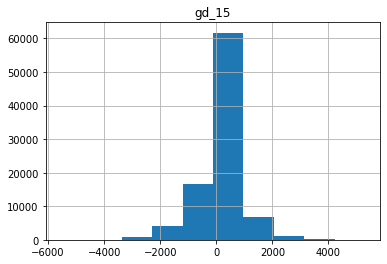

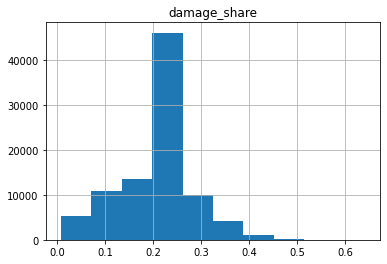

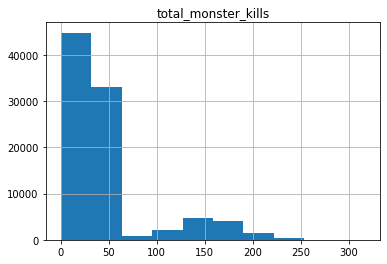

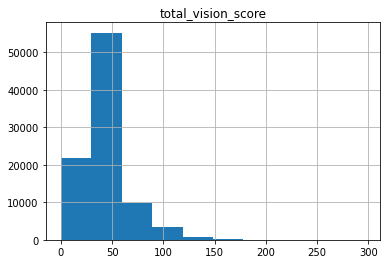

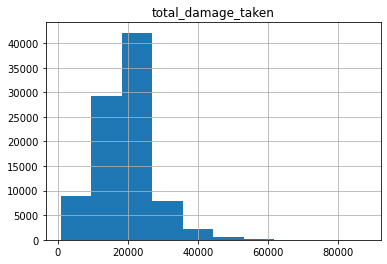

In [116]:
#check the data for outliers -> check which scaler would be best (standard, MinMax, Robust, etc
df_normalized_BLUE.hist(null_data_BLUE.keys()[1])
df_normalized_BLUE.hist(null_data_BLUE.keys()[4])
df_normalized_BLUE.hist(null_data_BLUE.keys()[6])
df_normalized_BLUE.hist(null_data_BLUE.keys()[7])
df_normalized_BLUE.hist(null_data_BLUE.keys()[8])

array([[<AxesSubplot:title={'center':'deaths_15'}>]], dtype=object)

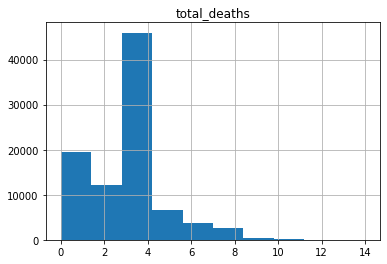

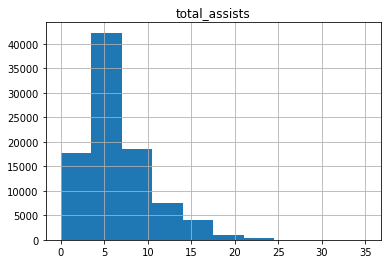

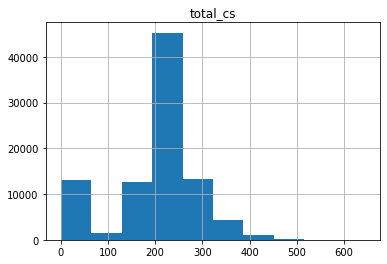

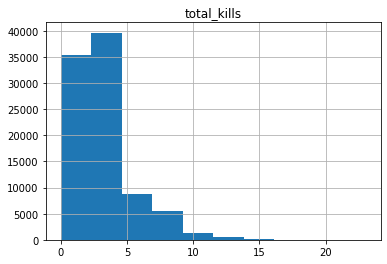

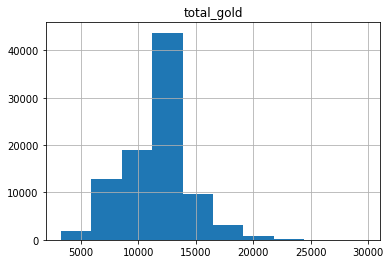

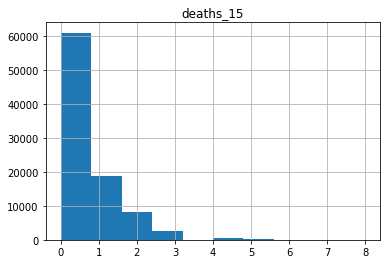

In [117]:
df_normalized_BLUE.hist(null_data_BLUE.keys()[9])
df_normalized_BLUE.hist(null_data_BLUE.keys()[10])
df_normalized_BLUE.hist(null_data_BLUE.keys()[11])
df_normalized_BLUE.hist(null_data_BLUE.keys()[12])
df_normalized_BLUE.hist(null_data_BLUE.keys()[13])
df_normalized_BLUE.hist(null_data_BLUE.keys()[14])

/tmp/ipykernel_13293/484651148.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_BLUE.hist(ax = ax)


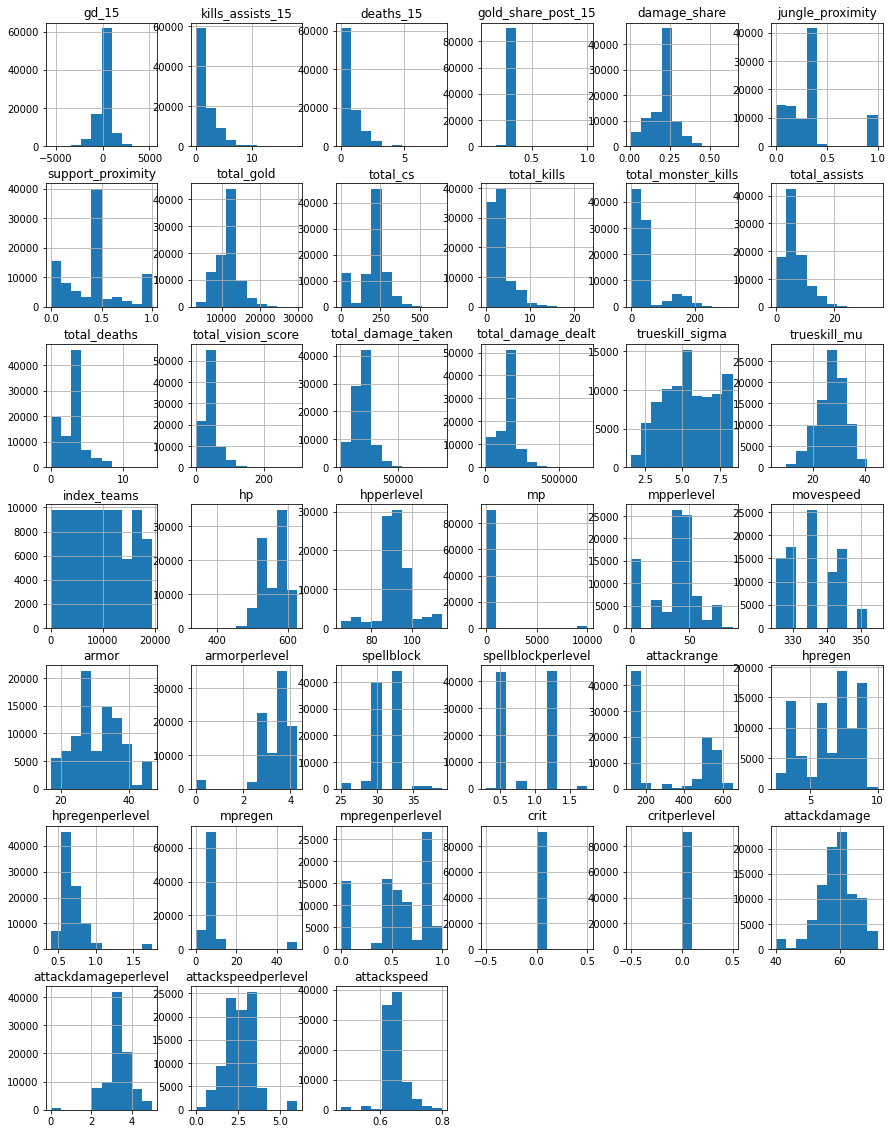

In [134]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_BLUE.hist(ax = ax)
plt.show()

In [121]:
df_BLUE.columns

Index(['gd_15', 'kills_assists_15', 'deaths_15', 'gold_share_post_15',
       'damage_share', 'jungle_proximity', 'support_proximity', 'total_gold',
       'total_cs', 'total_kills', 'total_monster_kills', 'total_assists',
       'total_deaths', 'total_vision_score', 'total_damage_taken',
       'total_damage_dealt', 'trueskill_sigma', 'trueskill_mu', 'win',
       'index_teams', 'hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed',
       'armor', 'armorperlevel', 'spellblock', 'spellblockperlevel',
       'attackrange', 'hpregen', 'hpregenperlevel', 'mpregen',
       'mpregenperlevel', 'crit', 'critperlevel', 'attackdamage',
       'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed'],
      dtype='object')

In [126]:
df_BLUE.describe()

,gd_15,kills_assists_15,deaths_15,gold_share_post_15,damage_share,jungle_proximity,support_proximity,total_gold,total_cs,total_kills,...,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
count,91270.000000,91270.000000,91270.000000,91270.000000,91270.000000,91270.000000,91270.000000,91270.000000,91270.000000,91270.000000,...,91264.000000,91264.000000,91264.000000,91264.000000,91264.0,91264.0,91264.000000,91264.000000,91264.000000,91264.000000
mean,57.140325,1.756693,0.628694,0.286348,0.200000,0.330280,0.406959,11289.614976,197.778115,2.976523,...,6.348757,0.683918,8.814463,0.550765,0.0,0.0,59.302756,3.211401,2.591776,0.645671
std,750.280083,1.828331,0.815642,0.029480,0.074648,0.268141,0.281818,2772.964907,85.438988,2.350264,...,1.878582,0.199037,9.588233,0.295067,0.0,0.0,5.866542,0.650277,0.910599,0.035645
min,-5544.000000,0.000000,0.000000,0.088862,0.008232,0.000000,0.000000,3244.000000,0.000000,0.000000,...,2.500000,0.400000,0.000000,0.000000,0.0,0.0,40.000000,0.000000,0.000000,0.475000
25%,-63.000000,0.000000,0.000000,0.286348,0.168881,0.153846,0.185151,9758.000000,178.000000,1.000000,...,5.000000,0.550000,6.000000,0.400000,0.0,0.0,55.360000,3.000000,2.000000,0.625000
50%,57.140325,1.756693,0.628694,0.286348,0.200000,0.330280,0.406959,11289.614976,197.778115,2.976523,...,7.000000,0.650000,8.000000,0.600000,0.0,0.0,60.000000,3.200000,2.500000,0.644000
75%,168.000000,2.000000,1.000000,0.286348,0.230052,0.330280,0.406959,12479.000000,244.000000,3.000000,...,8.000000,0.750000,8.180000,0.800000,0.0,0.0,63.000000,3.500000,3.200000,0.658000
max,5311.000000,18.000000,8.000000,1.000000,0.641138,1.000000,1.000000,29732.000000,645.000000,23.000000,...,10.000000,1.750000,50.000000,1.000000,0.0,0.0,72.000000,5.000000,6.000000,0.800000


In [127]:
df_BLUE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91270 entries, 0 to 91269
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gd_15                 91270 non-null  float64
 1   kills_assists_15      91270 non-null  float64
 2   deaths_15             91270 non-null  float64
 3   gold_share_post_15    91270 non-null  float64
 4   damage_share          91270 non-null  float64
 5   jungle_proximity      91270 non-null  float64
 6   support_proximity     91270 non-null  float64
 7   total_gold            91270 non-null  float64
 8   total_cs              91270 non-null  float64
 9   total_kills           91270 non-null  float64
 10  total_monster_kills   91270 non-null  float64
 11  total_assists         91270 non-null  float64
 12  total_deaths          91270 non-null  float64
 13  total_vision_score    91270 non-null  float64
 14  total_damage_taken    91270 non-null  float64
 15  total_damage_dealt 

In [139]:
#Scale the data using MinMax Scaler! Not sensible to outliers
from sklearn.preprocessing import MinMaxScaler 

for col in df_BLUE.columns:
    if col != 'win' and col != 'index_teams':
        scaler = MinMaxScaler()
        scaler.fit(df_BLUE[[col]])
        df_BLUE[[col]] = scaler.transform(df_BLUE[[col]])

/tmp/ipykernel_13293/3807840646.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_BLUE.hist(ax = ax)


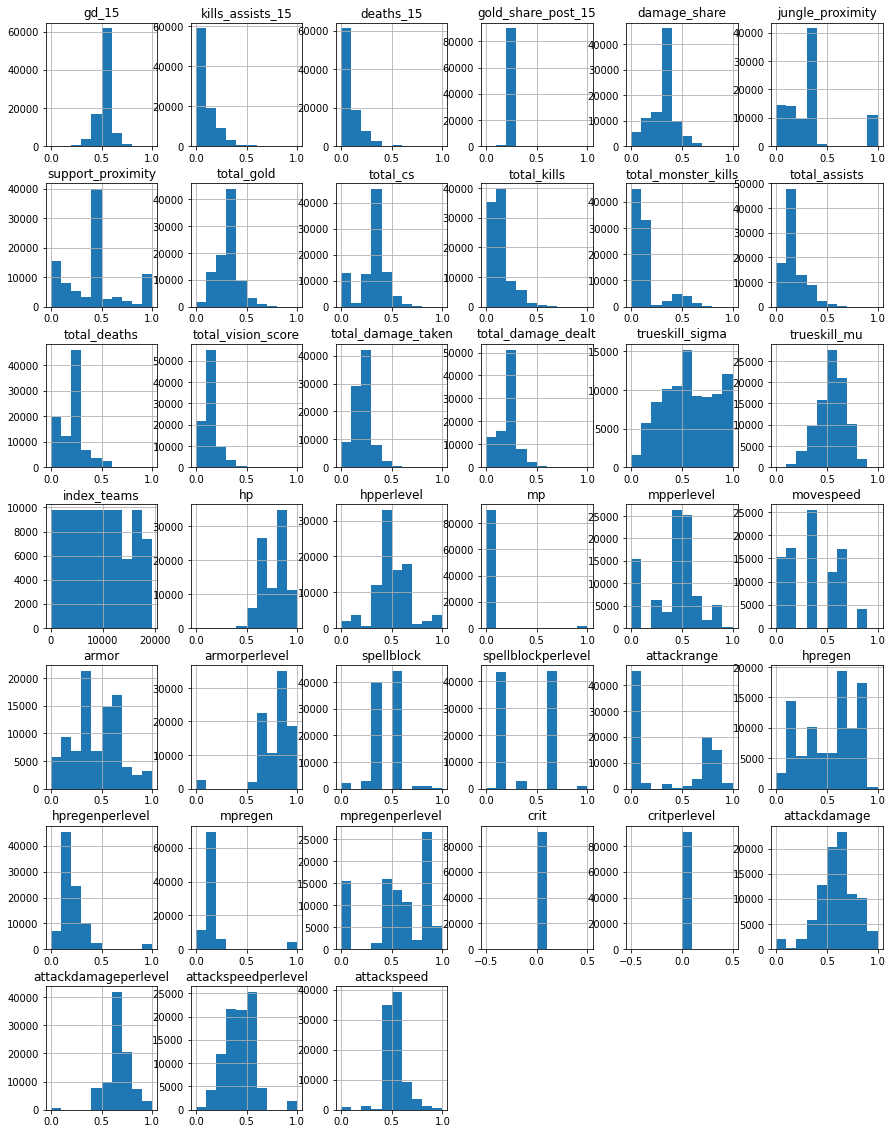

In [140]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_BLUE.hist(ax = ax)
plt.show()

# ML model just considering players individually

Use the df_normalize_BLUE(RED) for and easy ML model -> not include the teams or the champion composition